# Kriteria 1: Data merupakan hasil scraping secara mandiri
get 3000 review from google maps of Borobudur temple

In [2]:
import pandas as pd
import numpy as np
from google_play_scraper import app, reviews, Sort, reviews_all
import nltk
import keras as kr
from keras.layers import Dense, Input

nltk.download('punkt')

#========== use this before get the csv (uncomment)==========
# scrapreview = reviews_all(
#     'com.zte.iptvclient.android.idmnc',
#     lang='id',
#     country='id',
#     sort=Sort.MOST_RELEVANT,
#     count=3000
# )

# app_reviews_df = pd.DataFrame(scrapreview)
# app_reviews_df.shape
# app_reviews_df.head()
# app_reviews_df.to_csv('vplus_review.csv', index=False)

# app_reviews_df = pd.DataFrame(scrapreview)
#========== end use this before get the csv ==========

# ========== use this after get the csv ==========
app_reviews_df = pd.read_csv('dataset.csv')
app_reviews_df

[nltk_data] Downloading package punkt to /Users/fepriyadi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/m7/sjw8yb_1677_b06x0yxyy00m0000gq/T/ipykernel_77298/41746449.py:28: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  app_reviews_df = pd.read_csv('dataset.csv')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6916c330-f965-4dc5-a73e-7e9b84ec1354,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga di aplikasi, ga di google sama aja . berart...",1,42,11.5.1(17)_prd vision+ ahh,2025-10-11 16:18:13,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-11 16:19:07,11.5.1(17)_prd vision+ ahh
1,851dc45a-deb6-4bf0-bdd3-cfa7b130d6f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,jelek bnget sekarang layarnya gelap siaran TV ...,1,17,11.5.1(17)_prd vision+ ahh,2025-10-18 10:49:11,"Halo kak, makasih sudah mau kasih feedback juj...",2025-10-18 11:04:08,11.5.1(17)_prd vision+ ahh
2,a388adba-b3dc-453c-a8c3-333ecccba5b7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak ada yg bisa di tonton. .aplikasi kacau..ja...,1,4,11.5.1(17)_prd vision+ ahh,2025-10-12 23:16:46,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-12 23:17:45,11.5.1(17)_prd vision+ ahh
3,65bd63a8-8f89-4eb8-9c91-7781157f95a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat buruk, saya beli paket tidak bisa nonto...",1,3,11.5.1(17)_prd vision+ ahh,2025-10-13 22:02:11,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-13 22:19:16,11.5.1(17)_prd vision+ ahh
4,50b68e29-4d81-43fb-8c94-6956d91b78be,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya install krn ada paket internet bundling 3...,1,106,11.5.1(5)_prd vision+ ahh,2025-09-07 06:08:46,Hai kak 👋 terima kasih sudah kasih review mesk...,2025-09-11 16:21:04,11.5.1(5)_prd vision+ ahh
...,...,...,...,...,...,...,...,...,...,...,...
74217,3088884c-3e08-4a85-9a96-aa61223b3120,Mirham Firli,https://play-lh.googleusercontent.com/a-/ALV-U...,👍👍👍,2,0,NaN,2023-09-24 00:21:11,"Hai kak, Kami sangat menghargai kritik dan sar...",2023-09-24 12:24:26,NaN
74218,04a165da-4512-404b-a8f2-f8633fb5a332,Ayun Umami,https://play-lh.googleusercontent.com/a/ACg8oc...,😟,2,0,NaN,2022-02-17 16:50:15,Terima kasih atas review-nya. Vision+ akan ter...,2022-02-17 18:34:26,NaN
74219,c16b0af7-9c64-4e10-9862-cf205b772830,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,🤔,2,0,NaN,2019-04-10 19:21:37,"Terima kasih atas review-nya, kami sangat meng...",2019-04-11 08:27:46,NaN
74220,0c221d28-05fc-4537-95ab-5d1ba58580ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,NaN,5,0,NaN,2015-03-23 02:11:01,NaN,NaN,NaN


In [3]:

app_reviews_df['app_reviews_df'] = app_reviews_df['content'].fillna('')  
clean_df = app_reviews_df.dropna().drop_duplicates().reset_index(drop=True)
clean_df = clean_df.head(10000)
clean_df['content'].isna().sum()

0

In [4]:
len(clean_df)

clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app_reviews_df
0,6916c330-f965-4dc5-a73e-7e9b84ec1354,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga di aplikasi, ga di google sama aja . berart...",1,42,11.5.1(17)_prd vision+ ahh,2025-10-11 16:18:13,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-11 16:19:07,11.5.1(17)_prd vision+ ahh,"Ga di aplikasi, ga di google sama aja . berart..."
1,851dc45a-deb6-4bf0-bdd3-cfa7b130d6f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,jelek bnget sekarang layarnya gelap siaran TV ...,1,17,11.5.1(17)_prd vision+ ahh,2025-10-18 10:49:11,"Halo kak, makasih sudah mau kasih feedback juj...",2025-10-18 11:04:08,11.5.1(17)_prd vision+ ahh,jelek bnget sekarang layarnya gelap siaran TV ...
2,a388adba-b3dc-453c-a8c3-333ecccba5b7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak ada yg bisa di tonton. .aplikasi kacau..ja...,1,4,11.5.1(17)_prd vision+ ahh,2025-10-12 23:16:46,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-12 23:17:45,11.5.1(17)_prd vision+ ahh,gak ada yg bisa di tonton. .aplikasi kacau..ja...
3,65bd63a8-8f89-4eb8-9c91-7781157f95a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat buruk, saya beli paket tidak bisa nonto...",1,3,11.5.1(17)_prd vision+ ahh,2025-10-13 22:02:11,Hai kak 👋 terima kasih sudah menyempatkan kasi...,2025-10-13 22:19:16,11.5.1(17)_prd vision+ ahh,"sangat buruk, saya beli paket tidak bisa nonto..."
4,50b68e29-4d81-43fb-8c94-6956d91b78be,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya install krn ada paket internet bundling 3...,1,106,11.5.1(5)_prd vision+ ahh,2025-09-07 06:08:46,Hai kak 👋 terima kasih sudah kasih review mesk...,2025-09-11 16:21:04,11.5.1(5)_prd vision+ ahh,Saya install krn ada paket internet bundling 3...
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5c3436fb-eb08-4b7f-a6e9-d7c2d5b52b60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,susah banget aplikasinya baru aja masuk keluar...,2,0,6.20.0,2022-10-13 18:15:14,Hi Kak Agustina...Mohon Maaf atas ketidaknyama...,2022-10-13 18:25:57,6.20.0,susah banget aplikasinya baru aja masuk keluar...
9996,30e36c9a-3344-42e0-8d1a-0b71bd0522e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mantap,di perjalanan tetep bisa nonton tv",5,0,6.4.6,2021-08-14 00:06:43,"Terima kasih atas review-nya, selamat menikmat...",2021-08-14 01:11:00,6.4.6,"Mantap,di perjalanan tetep bisa nonton tv"
9997,6cb677ce-ab8d-472e-95ec-6237c43e1fc3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya gak bisa login lelet dan semakin b...,1,1,6.30.0,2023-08-13 16:56:50,Hi Vilenialls...Mohon Maaf atas ketidaknyamana...,2023-08-13 17:47:19,6.30.0,Aplikasinya gak bisa login lelet dan semakin b...
9998,46c86c8a-f690-4836-8a37-8256ec901678,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kok siaran kemarin ada yg gabisa diputar kenap...,3,0,6.0.1,2020-11-02 12:10:05,Mohon Maaf atas ketidaknyamanannya. Silakan co...,2020-11-02 12:27:25,6.0.1,Kok siaran kemarin ada yg gabisa diputar kenap...


# Preprocessing

In [5]:
import re
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import stanza
import unicodedata
from rapidfuzz import process, fuzz

stem_map_path = "stem_map.json"

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stanza.download('id') 
factory = StopWordRemoverFactory()
stopwords_sastrawi = factory.get_stop_words()
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "yg": "yanng"}
nlp_id = stanza.Pipeline(lang='id', processors='tokenize,lemma', use_gpu=False, verbose=False)

# build unique vocabulary (tokens)
vocab = set()
domain_vocab = list(vocab)  # or extend with known correct tokens

def cleaningText(text):
    if not isinstance(text, str):
        return ""
    # normalize unicode, remove control/invisible chars
    text = unicodedata.normalize("NFKC", text)
    text = re.sub(r'[\r\n\t]+', ' ', text)
    # remove mentions, hashtags, urls, digits
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r"[0-9]+", '', text)
    # remove characters other than letters/spaces (keeps internal whitespace)
    text = re.sub(r'[^A-Za-z\u00C0-\u024F\u1E00-\u1EFF\s]', ' ', text)
    # collapse whitespace and trim
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    return [kata for kata in text if kata.lower() not in stopwords_sastrawi]

#Stemming text
# ...existing code...
def stemmingText(words, stem_map):
    # expect `words` to be a list of tokens and return a list of stemmed tokens
    if words is None:
        return []
    # if tokens were accidentally joined into a string, split safely
    if isinstance(words, str):
        words = words.split()
    # ensure we have an iterable list/tuple
    if not isinstance(words, (list, tuple)):
        return []
    return [stem_map.get(w, w) for w in words]
# ...existing code...

def toSentence(list_words):
    # handle both list and already-joined string safely
    if isinstance(list_words, str):
        return list_words
    return ' '.join(list_words)

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

def fuzzy_fix_token(token, choices=domain_vocab, score_cutoff=80):
    match = process.extractOne(token, choices, scorer=fuzz.ratio, score_cutoff=score_cutoff)
    return match[0] if match else token

def lemmatize_sentence(text):
    if isinstance(text, (list, tuple)):
        text = ' '.join(text)
    elif not isinstance(text, str):
        text = str(text)
    doc = nlp_id(text)
    lemmas = []
    for sent in doc.sentences:
        for w in sent.words:
            lemmas.append(w.lemma if w.lemma else w.text)
    return lemmas

def fix_typo_sentence(text):
    tokens = text.split()
    return ' '.join(fuzzy_fix_token(t) for t in tokens)

#start preprocessing pipeline
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_caseFoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_caseFoldingText'].apply(fix_slangwords)

#========== fix typo start ==========
texts = clean_df['text_slangwords'].astype(str).tolist()
texts_fixed = [fix_typo_sentence(t) for t in texts]
lemmas_out = []
for txt in tqdm(texts_fixed, desc="Lemmatizing", total=len(texts_fixed)):
    doc = nlp_id(txt)             
    s = [w.lemma if w.lemma else w.text for sent in doc.sentences for w in sent.words]
    lemmas_out.append(' '.join(s))

clean_df['text_fixedtypo'] = lemmas_out
#========== fix typo end =================

clean_df['text_tokenizingText'] = clean_df['text_fixedtypo'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_lemmatized'] = clean_df['text_stopword'].apply(lemmatize_sentence)
clean_df['text_akhir'] = clean_df['text_lemmatized'].apply(toSentence)


/opt/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-03 17:09:58 INFO: Downloaded file to /Users/fepriyadi/stanza_resources/resources.json
2025-11-03 17:09:58 INFO: Downloading default packages for language: id (Indonesian) ...
2025-11-03 17:09:59 INFO: File exists: /Users/fepriyadi/stanza_resources/id/default.zip
2025-11-03 17:10:01 INFO: Finished downloading models and saved to /Users/fepriyadi/stanza_resources
Lemmatizing: 100%|██████████| 10000/10000 [03:04<00:00, 54.09it/s]


In [6]:
clean_df['text_lemmatized']

0       [ga, aplikasi, ga, google, sama, aja, arti, em...
1       [jelek, bnget, sekarang, layar, gelap, siar, t...
2       [gak, yanng, tonton, aplikasi, kacau, jaring, ...
3       [sangat, buruk, beli, paket, nonton, yanng, ka...
4       [install, krn, paket, internet, bundling, hari...
                              ...                        
9995    [susah, banget, aplikasi, baru, aja, masuk, ke...
9996                   [mantap, jalan, tetep, nonton, tv]
9997        [aplikasi, gak, login, lelet, semakin, buruk]
9998    [kok, siar, kemarin, yanng, gabisa, putar, bia...
9999    [knpa, y, kok, sulit, langgan, aktif, tpi, gk,...
Name: text_lemmatized, Length: 10000, dtype: object

# Kriteria 2: Melakukan tahapan ekstraksi fitur dan pelabelan data

In [7]:
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt

# membaca data kamus kata-kata positif dari github
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

<function matplotlib.pyplot.show(close=None, block=None)>

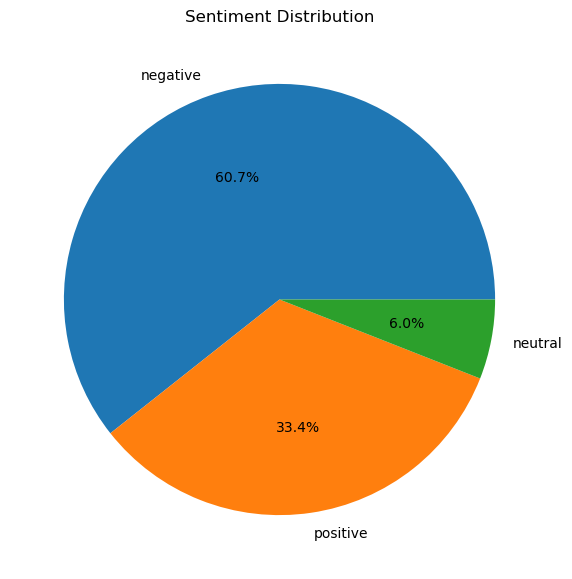

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if(word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if(word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity = ''
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

results = clean_df['text_lemmatized'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# print(clean_df['polarity'].value_counts())

plt.figure(figsize=(7, 7))
plt.pie(clean_df['polarity'].value_counts(), labels=clean_df['polarity'].value_counts().index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show

Class counts:
 polarity
negative    6065
positive    3338
neutral      597
Name: count, dtype: int64

Class percents (%):
 polarity
negative    60.65
positive    33.38
neutral      5.97
Name: proportion, dtype: float64

Imbalance ratio (largest / smallest): 10.16
=> Strongly imbalanced


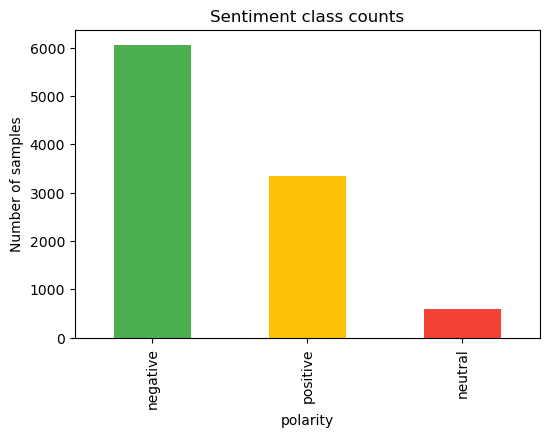

In [9]:
# ...existing code...
counts = clean_df['polarity'].value_counts()
percents = clean_df['polarity'].value_counts(normalize=True) * 100

print("Class counts:\n", counts)
print("\nClass percents (%):\n", percents.round(2))

# imbalance ratio
imbalance_ratio = counts.max() / counts.min() if counts.min() > 0 else float('inf')
print(f"\nImbalance ratio (largest / smallest): {imbalance_ratio:.2f}")

if imbalance_ratio <= 1.5:
    print("=> Distribution roughly balanced")
elif imbalance_ratio <= 2.5:
    print("=> Moderately imbalanced")
else:
    print("=> Strongly imbalanced")

# quick bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['#4CAF50','#FFC107','#F44336'])
plt.title("Sentiment class counts")
plt.ylabel("Number of samples")
plt.show()

# Kriteria 3: Menggunakan algoritma pelatihan machine learning

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# ======== 1️⃣ LOAD AND PREPARE DATA ========
# Example: replace with your own DataFrame
sentences = clean_df['text_akhir'].astype(str).tolist()
y_data = clean_df['polarity'].tolist()

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_data)

# ======== 2️⃣ TF-IDF VECTORIZATION ========
max_features = 6000  # limit vocab size to avoid overfitting
tfidf = TfidfVectorizer(max_features=max_features)
X_tfidf = tfidf.fit_transform(sentences).toarray()

print(f"✅ TF-IDF shape: {X_tfidf.shape}")

# ======== 3️⃣ BALANCE DATA ========
X_res, y_res = SMOTE(random_state=42).fit_resample(X_tfidf, y_encoded)
print(f"✅ After resampling: {X_res.shape}, {y_res.shape}")


✅ TF-IDF shape: (10000, 6000)
✅ After resampling: (18195, 6000), (18195,)



Class counts:
 negative    6065
neutral     6065
positive    6065
Name: count, dtype: int64

Class percents (%):
 negative    33.33
neutral     33.33
positive    33.33
Name: count, dtype: float64


/var/folders/m7/sjw8yb_1677_b06x0yxyy00m0000gq/T/ipykernel_77298/2283709030.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette="muted")


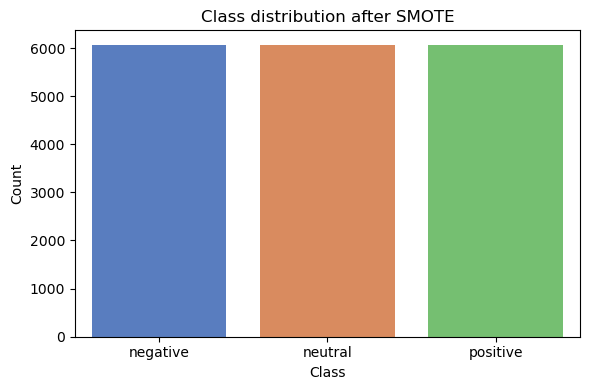

In [11]:
import seaborn as sns

# counts & percents
counts = pd.Series(y_res).value_counts().sort_index()
if 'encoder' in globals():
    label_map = {i:lab for i,lab in enumerate(encoder.classes_)}
    counts.index = counts.index.map(label_map)
print("\nClass counts:\n", counts)
print("\nClass percents (%):\n", (counts / counts.sum() * 100).round(2))

# bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette="muted")
plt.title("Class distribution after SMOTE")
plt.ylabel("Count")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

In [12]:
from keras.callbacks import EarlyStopping, Callback
from keras.layers import LSTM
import random

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# ======== 4️⃣ SPLIT DATA ========
# X_res = X_res.reshape(-1, timesteps, feat)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# ======== 5️⃣ RESHAPE FOR LSTM INPUT ========
# LSTM expects 3D input: (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

print(f"✅ LSTM input shape: {X_train.shape}")

classes = np.unique(y_train)

# ======== 6️⃣ BUILD LSTM MODEL ========
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_encoded))

model = models.Sequential([
    Input(shape=(input_dim, X_train.shape[2])),
    LSTM(128, dropout=0, recurrent_dropout=0, return_sequences=True),
    LSTM(64, dropout=0, recurrent_dropout=0),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=kr.optimizers.Adam(learning_rate=1e-4), 
              metrics=['accuracy'])

model.summary()

# ======== 7️⃣ TRAIN MODEL ========
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True
)

class AccuracyThresholdCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') and logs.get('accuracy') <= 0.10:
            print(f"\n✅ Training stopped — accuracy reached {logs.get('accuracy'):.2f}")
            self.model.stop_training = True

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=64,
    callbacks=[AccuracyThresholdCallback(),early_stopping],
    verbose=1
)

✅ LSTM input shape: (14556, 1, 6000)


2025-11-03 17:15:43.224627: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-03 17:15:43.224885: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-03 17:15:43.224899: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1762164943.225258 40582585 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1762164943.225687 40582585 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │     3,138,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,206,211 (12.23 MB)

 Trainable params: 3,206,211 (12.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


2025-11-03 17:15:44.997471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4346 - loss: 1.0961 - val_accuracy: 0.4928 - val_loss: 1.0850
Epoch 2/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6718 - loss: 0.9523 - val_accuracy: 0.6868 - val_loss: 0.7766
Epoch 3/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7943 - loss: 0.5911 - val_accuracy: 0.8183 - val_loss: 0.5412
Epoch 4/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9223 - loss: 0.3020 - val_accuracy: 0.8891 - val_loss: 0.3342
Epoch 5/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9659 - loss: 0.1340 - val_accuracy: 0.9231 - val_loss: 0.2589
Epoch 6/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9858 - loss: 0.0673 - val_accuracy: 0.9334 - val_loss: 0.2457
Epoch 7/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9939 - loss: 0.0362 - val_accuracy: 0.9368 - val_loss: 0.2534
Epoch 8/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9973 - loss: 0.0209 - val_accuracy: 0.93

# Kriteria 4: Akurasi testing set yang didapatkan minimal harus mencapai 85%

In [13]:
# ======== 8️⃣ EVALUATE ========
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Final test accuracy: {acc*100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9481 - loss: 0.3495
✅ Final test accuracy: 94.81%


In [14]:
# app_reviews_df = pd.read_csv('vplus_review.csv')

# app_reviews_df['app_reviews_df'] = app_reviews_df['content'].fillna('')  
# clean_df = app_reviews_df.dropna().drop_duplicates().reset_index(drop=True)
# clean_df['content'].isna().sum()

# Show result

texts = [
    "Film ini sangat bagus dan menginspirasi!",
    "Pelayanannya lambat dan makanannya tidak enak.",
    "Filmnya biasa saja, tidak terlalu menarik.",
    "Saya sangat puas dengan produk ini.",
    "Pengalaman belanja yang mengecewakan.",
    "Layanan pelanggan sangat membantu dan responsif.",
    "Produk ini tidak sesuai dengan deskripsi yang diberikan.",
    "Saya sangat senang dengan hasil yang saya dapatkan dari layanan ini.",
    "Kualitas barangnya buruk dan cepat rusak.",
    "Pengiriman tepat waktu dan produk sesuai harapan.",
    "Saya benci menunggu dalam antrean yang panjang.",
    "Pelayanan di restoran itu luar biasa cepat dan ramah.",
    "Saya suka sekali dengan fitur-fitur yang ditawarkan aplikasi ini.",
    "Aplikasi ini sering crash dan sangat mengecewakan.",
    "Desain antarmuka aplikasi ini sangat menarik dan mudah digunakan.",
    "Fitur-fitur yang disediakan sangat membantu dalam pekerjaan saya.",
    "Aplikasi ini sering mengalami bug yang mengganggu pengalaman pengguna.",
    "Saya merasa aplikasi ini sangat berguna untuk kebutuhan sehari-hari saya.",
    "Aplikasi ini lambat dan sering mengalami gangguan.",
    "Saya sangat merekomendasikan aplikasi ini kepada teman-teman saya."
]

# texts = clean_df['content'].astype(str).tolist()

cleaned_texts = [cleaningText(t) for t in texts]

casefolding_texts = [casefoldingText(t) for t in cleaned_texts]

slangwords_texts = [fix_slangwords(t) for t in casefolding_texts]

texts_fixed = [fix_typo_sentence(t) for t in slangwords_texts]
lemmas_out = []
for txt in tqdm(texts_fixed, desc="Lemmatizing", total=len(texts_fixed)):
    doc = nlp_id(txt)             
    s = [w.lemma if w.lemma else w.text for sent in doc.sentences for w in sent.words]
    lemmas_out.append(' '.join(s))

#========== fix typo end =================

tokenizing_texts = [tokenizingText(t) for t in lemmas_out]

filtering_texts = [filteringText(t) for t in tokenizing_texts]

lematized_texts = [lemmatize_sentence(t) for t in filtering_texts]

sentences = [toSentence(t) for t in lematized_texts]
#========== fix typo start ==========

# TF-IDF transform and reshape
X_new = tfidf.transform(sentences).toarray()
X_new = np.expand_dims(X_new, axis=1)

# Predict
predictions = model.predict(X_new)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_classes)

# Show result
for text, label, score in zip(sentences, predicted_labels, predictions):
    print(f"{text} → {label} (confidence={np.max(score):.2f})")



Lemmatizing: 100%|██████████| 20/20 [00:00<00:00, 177.04it/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
film sangat bagus inspirasi → negative (confidence=1.00)
layan lambat makan enak → neutral (confidence=0.55)
film biasa terlalu menarik → negative (confidence=1.00)
sangat puas produk → negative (confidence=0.75)
pengalaman belanja kecewa → positive (confidence=1.00)
layan langgan sangat bantu responsif → neutral (confidence=1.00)
produk sesuai deskripsi beri → positive (confidence=0.62)
sangat senang hasil layan → positive (confidence=0.96)
kualitas barang buruk cepat rusak → negative (confidence=1.00)
kirim tepat waktu produk sesuai harap → positive (confidence=1.00)
benci tunggu antrean panjang → negative (confidence=0.86)
layan restoran luar biasa cepat ramah → positive (confidence=0.93)
suka sekali fitur fitur tawar aplikasi → negative (confidence=1.00)
aplikasi sering crash sangat kecewa → negative (confidence=1.00)
desain antarmuka aplikasi sangat menarik mudah → negative (confidence=1.00)
fitur fitur sedia sangat bantu pekerja → positive (

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
00 TRUE: positive | PRED: neutral  ❌
01 TRUE: positive | PRED: negative ❌
02 TRUE: negative | PRED: negative ✅
03 TRUE: negative | PRED: positive ❌
04 TRUE: negative | PRED: negative ✅
05 TRUE: neutral  | PRED: neutral  ✅
06 TRUE: negative | PRED: negative ✅
07 TRUE: negative | PRED: negative ✅
08 TRUE: positive | PRED: positive ✅
09 TRUE: negative | PRED: negative ✅
10 TRUE: neutral  | PRED: neutral  ✅
11 TRUE: neutral  | PRED: neutral  ✅
12 TRUE: negative | PRED: negative ✅
13 TRUE: negative | PRED: negative ✅
14 TRUE: negative | PRED: negative ✅
15 TRUE: positive | PRED: positive ✅
16 TRUE: positive | PRED: positive ✅
17 TRUE: neutral  | PRED: neutral  ✅
18 TRUE: neutral  | PRED: neutral  ✅
19 TRUE: positive | PRED: positive ✅

Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.89      0.93      1213
     neutral       0.93      1.00      0.96      1213
    positive       0.94      0.9

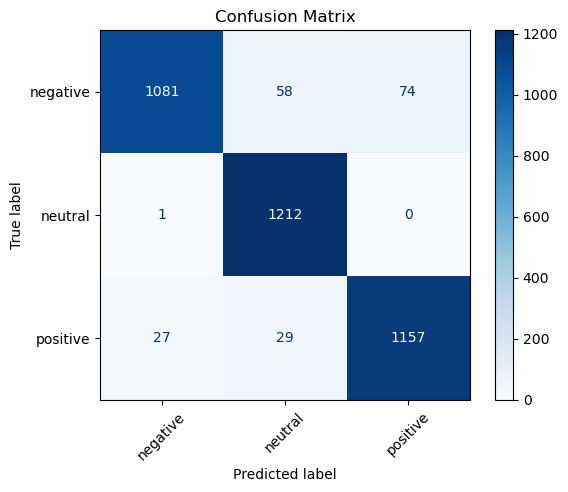

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pred_test = np.argmax(model.predict(X_test), axis=1)
y_test_int = y_test

for i in range(min(20, X_new.shape[0])):
    true_idx = y_test_int[i]
    pred_idx = pred_test[i]
    true_label = encoder.inverse_transform([y_test_int[i]])[0]
    pred_label = encoder.inverse_transform([pred_test[i]])[0]
    mark = "✅" if true_label == pred_label else "❌"
    print(f"{i:02d} TRUE: {true_label:<8} | PRED: {pred_label:<8} {mark}")


print("\nClassification Report:")
print(classification_report(y_test_int, pred_test, target_names=encoder.classes_))

cm = confusion_matrix(y_test_int, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()